<a href="https://colab.research.google.com/github/ljohri/Campaign13_evc/blob/master/Astrov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The following program plots the graphs of EPIC ID's.

Run each cell by clicking the number in the top-left corner. You need to run the cells in the order they are presented. Once you have done so, you should see two graphs: one by the python matplotlib library (blue one on the top), and one by the lightkurve library (black one on the bottom). I have implemented a form of outlier removal. It removes values that are more than 5 sigma from the average of the data. Comment out the "lc = outlier_removal(lc, sigma_value)" line in the plot_EPIC_ID function in order to see how the graphs look with the outliers.

In [0]:
!pip install lightkurve --upgrade
print("lightkurve installed!")

In [2]:
import lightkurve as lk
import pandas
import pathlib
import os
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
print("Imports done.")

Imports done.


In [13]:
def outlier_removal(lc, sigma_value):
    lc = lc.remove_outliers(sigma = sigma_value)
    return lc #removes outliers

def plot_EPIC_ID(epic, sigma_value = 5):
    search = lk.search_targetpixelfile(epic, mission='K2')
    print(search)
    pixelfile = search.download(quality_bitmask='default' ) #gets the data about the EPIC ID
    print('*********Quarter :' ,pixelfile.quarter, 'Mission : ',pixelfile.mission )
    #pixelfile.interact(notebook_url='localhost:8893')
    fname = str(epic)+'.fits'
               
    lc = pixelfile.to_lightcurve(aperture_mask='all') #gets the light curve information
    lc = outlier_removal(lc, sigma_value) #calls the function that removes outliers
    lc.to_fits(path=fname, overwrite=True)
    #files.download(fname)    
    return lc #returns the light curve information
print("Functions defined.")

Functions defined.


SearchResult containing 1 data products.

 target_name           productFilename                        description              distance
------------- ---------------------------------- ------------------------------------- --------
ktwo203954898 ktwo203954898-c02_lpd-targ.fits.gz Target Pixel Long Cadence (KTL) - C02      0.0


*********Quarter : None Mission :  K2
EPIC ID:  203954898
total number of points=  2401


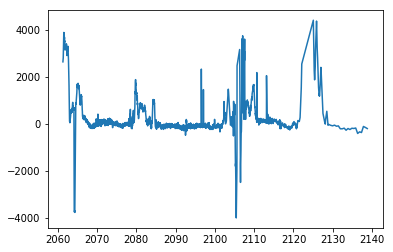

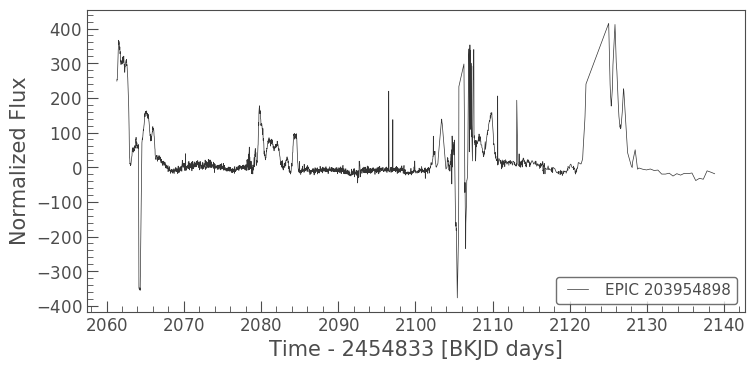

In [14]:
targets = [203954898] #Enter your EPIC ID's here 203954898 204342099 203928175
flux = []
time = []
err=[]
dataset1 = list()

for i in targets:
    light_curve_info = plot_EPIC_ID(i) #gets the light curve information for the ith EPIC ID in targets   
    flux.append(light_curve_info.flux) #gets the flux data about the ith EPIC ID, and adds it to the list of information about the fluxes of all the EPIC ID's
    time.append(light_curve_info.time) #gets the time data about the ith EPIC ID, and adds it to the list of information about the times of all the EPIC ID's
    err.append(light_curve_info.flux_err)
    data = pandas.DataFrame({"Time":time[-1], "Flux":flux[-1], "Err":err[-1]}) #creates a dataframe with the time and flux
    data.set_index(data.columns[0], inplace=True, drop = True) #sets the time as the index for finding the flux
    dataset1.append(data) #appends the data into a Series that will contain the data of every single EPIC ID
    fname = str(i)+'.csv'
    data.to_csv(fname)
    files.download(fname) 
    
dataset = pandas.Series(dataset1, index = targets) #sets the EPIC ID as the index for finding the flux data over time

for i in range(len(targets)):
  print("EPIC ID: ", targets[i]) #prints the EPIc ID
  flux = list(dataset.iloc[i]["Flux"]) #gets the flux data about the EPIC ID
  time = list(dataset.iloc[i].index) #gets the time information about the EPIC ID
  print('total number of points= ',len(time))
  
  plt.plot(time, flux) #plots using matplotlib
  light_curve_info.plot() #plots using the lightkurve.plot function
  plt.show() #shows the plots
  print()
  print();

Is there a reason why the two graphs (matplotlib and lightkurve.plot) are different? Why do their shapes match up?
They are both graphing the same thing, but the y-axes have different scales.
The flux values match up with the top graph
but the plotting function provided by lightkuve (bottom) must have some reason for changing the scales.
Could the bottom graph be related to the z-score of the data?
I think that the bottom is the normalized flux, and the top is the regular flux (even though it too is labelled as normalized)